# Import required libraries

In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
from yellowbrick.classifier import ConfusionMatrix
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
from matplotlib import colors as mcolors

from keras.models import Sequential
from keras.layers import Dense
colors = list(mcolors.CSS4_COLORS)


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [29]:
df = pd.read_csv('/content/covtype.data.gz', compression='gzip',header=None, sep=',', quotechar='"', error_bad_lines=False)


In [30]:
df.columns=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40', 'Cover_Type']

# Exploring data features

In [31]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [32]:
#Checking for missing values
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


There are no missing values, next we check the info to get the idea about the datatypes and other related information, after that we check the basic stats of the data to get better understanding

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [34]:
df.Cover_Type.value_counts()
# We see that the most of the classes belong to the 2nd class 


2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [35]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

# Prepare data for classification 
First the data is scaled on the same scale and then We split the data into train and test split to train the data and then evaluate performance of differnet algorithms that we would be using to classify the data

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
scaler=MinMaxScaler()

y=df.Cover_Type.values
y=lbl.fit_transform(y)
X=df.drop(columns=['Cover_Type']).values
X=scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, random_state=40)


# Fitting different algorithms for predictions
In the next step we would be fitting following three models
* Logistic Regression
* RandomForest Regression
* Linear SVC

to get the best model out of them, then we would evaluate the model's performance to see it's performance .

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
lr=LogisticRegression(max_iter=1000,multi_class="auto", solver="liblinear")
lr.fit(X_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
lr_pred=lr.predict(X_test)
lr_accuracy=accuracy_score(y_test,lr_pred)
print(lr_accuracy)


0.7140100256018588


In [39]:
print(multilabel_confusion_matrix(y_test,lr.predict(X_test)))


[[[247494  47773]
  [ 53006 116537]]

 [[173877  64434]
  [ 45844 180655]]

 [[420444  15880]
  [  3602  24884]]

 [[462390    228]
  [  1734    458]]

 [[456994    183]
  [  7585     48]]

 [[449928    935]
  [ 13179    768]]

 [[444802   3498]
  [  7981   8529]]]


In [40]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70    169543
           1       0.74      0.80      0.77    226499
           2       0.61      0.87      0.72     28486
           3       0.67      0.21      0.32      2192
           4       0.21      0.01      0.01      7633
           5       0.45      0.06      0.10     13947
           6       0.71      0.52      0.60     16510

    accuracy                           0.71    464810
   macro avg       0.58      0.45      0.46    464810
weighted avg       0.70      0.71      0.70    464810



0.11854090918870076

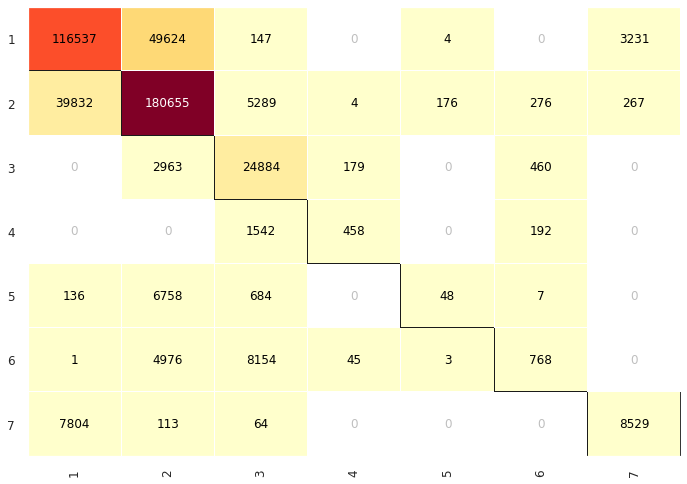

In [41]:
cm = ConfusionMatrix(lr, classes=lbl.classes_, label_encoder=lbl
                )
cm.fit(X_train, y_train)

cm.score(X_test, y_test)




The Confusion matrix plot for logistic regression shows that various information for the 7 classes in the dataset, the important thing to note here is that in some cases the number of true positive cases are are the highest and in few cases the True negative is zero which shows the models ability to coverge to various classes and is not focusing on only one class.

# Random Forest

In [42]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)


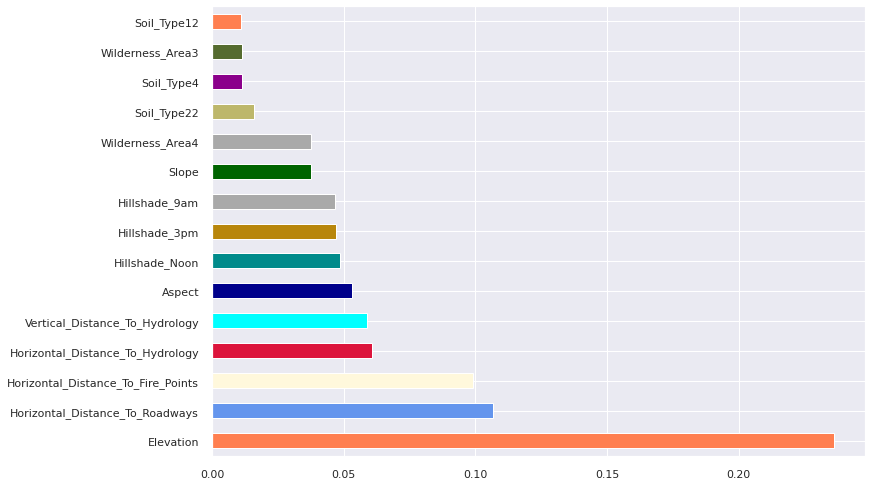

In [43]:
feat_importances = pd.Series(rfc.feature_importances_, index=df.columns.drop('Cover_Type'))
feat_importances.nlargest(15).plot(kind='barh',color=colors[16:30])

We plot the top 15 features that plays important role in the creation of the Trees for the random forest, we can also think this of as the most important features for making the predictions about the classes, since the RF gives the best accuracy out of others three algorithms so we can see that the

* Elevation
* Horizontal Distance to the Roadways
* Horizontal Distance to the Fire points

are the top three features for creation of the forest.

In [44]:
rf_accuracy=accuracy_score(y_test,rfc_pred)
print(rf_accuracy)


0.9158150642197888


In [45]:
print(multilabel_confusion_matrix(y_test,rfc.predict(X_test)))


[[[283546  11721]
  [ 17133 152410]]

 [[216825  21486]
  [ 11359 215140]]

 [[432900   3424]
  [  1769  26717]]

 [[462423    195]
  [   470   1722]]

 [[456824    353]
  [  3342   4291]]

 [[449495   1368]
  [  3144  10803]]

 [[447717    583]
  [  1913  14597]]]


In [46]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91    169543
           1       0.91      0.95      0.93    226499
           2       0.89      0.94      0.91     28486
           3       0.90      0.79      0.84      2192
           4       0.92      0.56      0.70      7633
           5       0.89      0.77      0.83     13947
           6       0.96      0.88      0.92     16510

    accuracy                           0.92    464810
   macro avg       0.91      0.83      0.86    464810
weighted avg       0.92      0.92      0.91    464810



0.03742819646737377

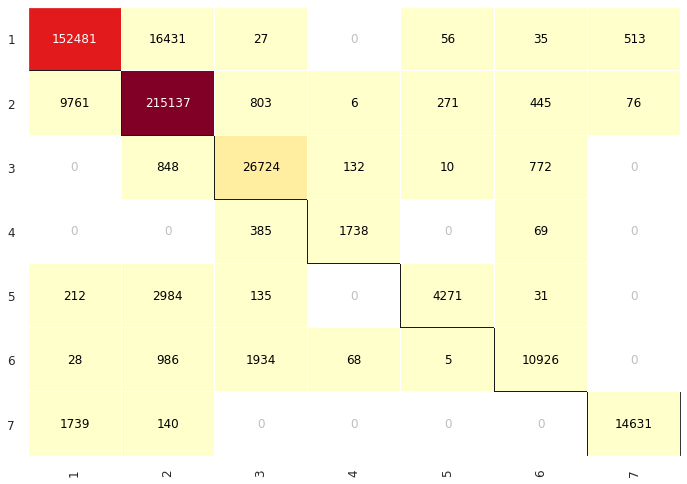

In [47]:
cm = ConfusionMatrix(rfc, classes=lbl.classes_, label_encoder=lbl
                )
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Like Logistic Regression the confusion matrix for RFC is plotted to see it's performance,if we only take the top left of the matrix and compare it with the logistic regression we can see that the RF is better at giving the predictions than that of Logistic Regression, the same fact for the class can be verififed by looking at the F-1 score in the classification report of the two models. The other classes decipts the same information when compared to the Logistic Regression. Also for the Random Forest's F-1 score for class three is 0.84 which is very great as compared to the Logistic Regression F-1 Score for class three which was 0.32.

# Linear SVC

In [48]:
svc = LinearSVC()
svc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [49]:
svc_pred=svc.predict(X_test)
svc_accuracy=accuracy_score(y_test,svc_pred)
print(svc_accuracy)

0.7123577375701899


In [50]:
print(multilabel_confusion_matrix(y_test,svc.predict(X_test)))


[[[247112  48155]
  [ 53533 116010]]

 [[173403  64908]
  [ 45816 180683]]

 [[420247  16077]
  [  3484  25002]]

 [[462392    226]
  [  1747    445]]

 [[457148     29]
  [  7607     26]]

 [[450150    713]
  [ 13366    581]]

 [[444709   3591]
  [  8146   8364]]]


In [51]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.71      0.68      0.70    169543
           1       0.74      0.80      0.77    226499
           2       0.61      0.88      0.72     28486
           3       0.66      0.20      0.31      2192
           4       0.47      0.00      0.01      7633
           5       0.45      0.04      0.08     13947
           6       0.70      0.51      0.59     16510

    accuracy                           0.71    464810
   macro avg       0.62      0.44      0.45    464810
weighted avg       0.70      0.71      0.70    464810



0.11947032120651449

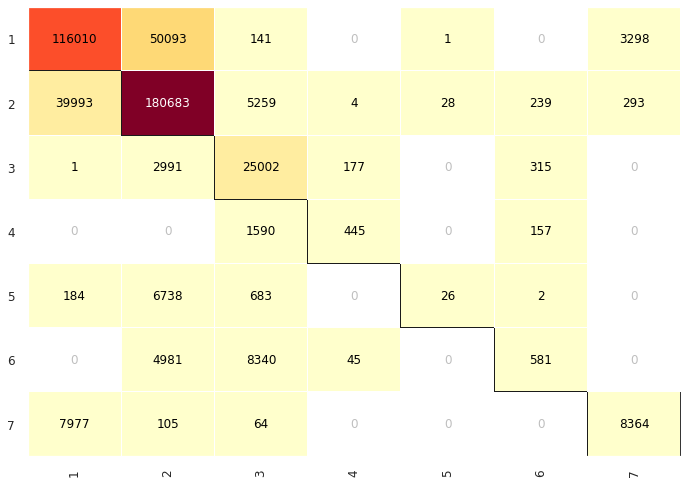

In [52]:
cm = ConfusionMatrix(svc, classes=lbl.classes_, label_encoder=lbl
                )
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

In the last the confusion matrix for the LInear SVC is plotted , the performance of the Linear SVC is almost identical to that of the Logistic Regression , if we see for the class six the F-1 score and the confusion matrix for the Logistic regression is 0.1 points better than that of Linear SVC which explains that there is a very small variance in the results of the two algorithm.

# Accuracy comparision

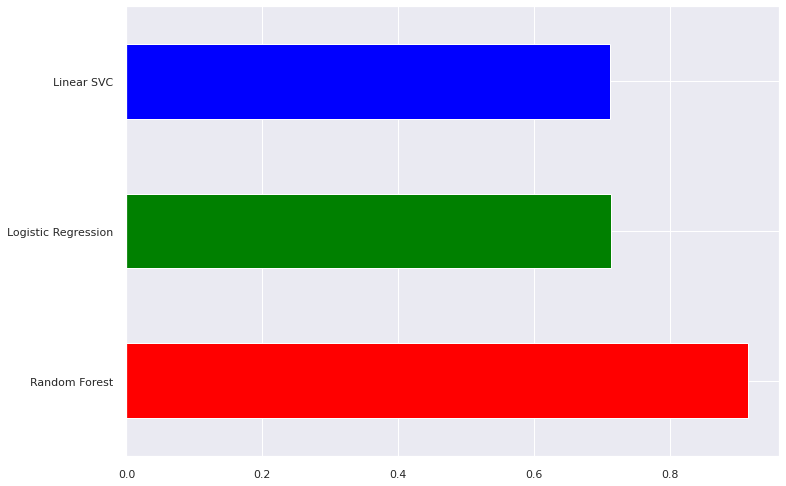

In [53]:
pd.Series([rf_accuracy,lr_accuracy,svc_accuracy],index=['Random Forest','Logistic Regression','Linear SVC']).plot(kind='barh',
                                                                                                                 color=['red','green','blue'])

We plot a bar plot to see that accuracy comparision of the three models and it is very clear that the Random Forest wins the race, and has a very high accuracy.

So from the above results it is evident that the RandomForest with the default parameters is the best fitting model with the default parameters, next we evaluate the model to see that how it would do on the test set.

So from the observations above it is clear that the model is not overfitting or underfitting on the test set because the accuracy on the test set is 91.61 % which is good considering that the model is fitted using default parameters,the classfication report on the test set also supports this fact that the model is good at classifiying the Cover_type because the F-1 score for every class is good expect class "5" so we aim to imporve the accuracy and F-1 score of the model in the next step by hyperparameter tuning to find the best fitting parameters for the model.

# Hyper paramter tuning

To get the best hyperparameter for the best fitting model

In [54]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier() 

params = { 
    'n_estimators': [200, 700]}
    
CV_rfc = GridSearchCV(estimator=rfc, param_grid=params, cv= 2,n_jobs=-1,verbose=3,
                     )
CV_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.3min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [55]:
CV_rfc.best_params_ 
#So 700 trees are the best fitting parameters 

{'n_estimators': 700}

In [56]:
print(multilabel_confusion_matrix(y_test,CV_rfc.predict(X_test)))


[[[284101  11166]
  [ 17130 152413]]

 [[216923  21388]
  [ 10796 215703]]

 [[433004   3320]
  [  1727  26759]]

 [[462414    204]
  [   453   1739]]

 [[456857    320]
  [  3294   4339]]

 [[449527   1336]
  [  3053  10894]]

 [[447705    595]
  [  1876  14634]]]


In [57]:
print(accuracy_score(y_test,CV_rfc.predict(X_test)))


0.9175383490028184


In [58]:
print(classification_report(y_test,CV_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92    169543
           1       0.91      0.95      0.93    226499
           2       0.89      0.94      0.91     28486
           3       0.90      0.79      0.84      2192
           4       0.93      0.57      0.71      7633
           5       0.89      0.78      0.83     13947
           6       0.96      0.89      0.92     16510

    accuracy                           0.92    464810
   macro avg       0.92      0.83      0.87    464810
weighted avg       0.92      0.92      0.92    464810



Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.2min finished


0.03744540780103698

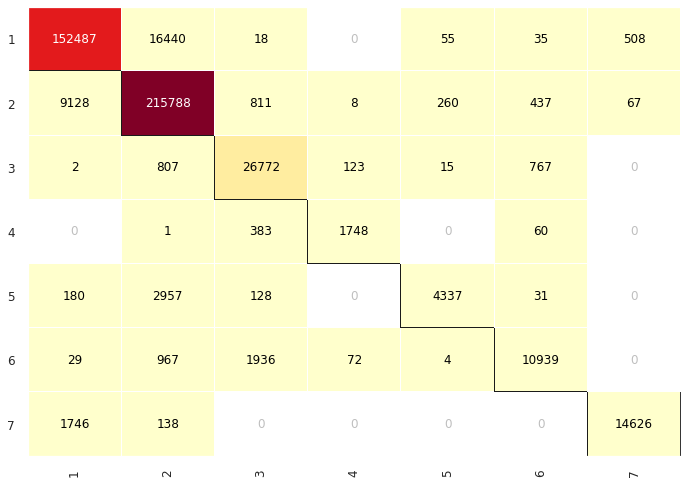

In [59]:
cm = ConfusionMatrix(CV_rfc, classes=lbl.classes_, label_encoder=lbl
                )
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

After hyperparamter tuning the model accuracy increases to 91.76 % which indicates that hyperparameter tuning by using more trees the accuracy increases.

# Creating Neural Network

Next we make the use of KERAS to create a simple Neural Network with the ability to classify multilabel problem as ours. The model would have one input layer with activation function as relu, one hidden layer with relu activation and an output layer with softmax activation as we have multilabels, we would use adam optimizer to reduce the errors in the predictions and use categorical cross entropy as loss function

In [60]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

model=Sequential([Dense(128, activation='relu',input_dim=54)
                  ,Dense(64, activation='sigmoid')
                  ,Dense(8,activation ='softmax')])
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

red_lr= ReduceLROnPlateau(monitor='accuracy',patience=3,verbose=1,factor=0.1) #define early stop criteria
model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer=Adam(0.001))


In [61]:
model.fit(X_train,y_train,epochs=100,verbose=1,batch_size=128,callbacks=red_lr)

Epoch 1/100
908/908 [==============================] - 2s 2ms/step - loss: 1.0252 - accuracy: 0.5746
Epoch 2/100
908/908 [==============================] - 2s 2ms/step - loss: 0.6746 - accuracy: 0.7180
Epoch 3/100
908/908 [==============================] - 2s 2ms/step - loss: 0.6412 - accuracy: 0.7285
Epoch 4/100
908/908 [==============================] - 2s 2ms/step - loss: 0.6236 - accuracy: 0.7353
Epoch 5/100
908/908 [==============================] - 2s 2ms/step - loss: 0.6100 - accuracy: 0.7396
Epoch 6/100
908/908 [==============================] - 2s 2ms/step - loss: 0.6015 - accuracy: 0.7433
Epoch 7/100
908/908 [==============================] - 1s 2ms/step - loss: 0.5876 - accuracy: 0.7495
Epoch 8/100
908/908 [==============================] - 2s 2ms/step - loss: 0.5825 - accuracy: 0.7508
Epoch 9/100
908/908 [==============================] - 2s 2ms/step - loss: 0.5676 - accuracy: 0.7593
Epoch 10/100
908/908 [==============================] - 1s 2ms/step - loss: 0.5629 - accura

In [62]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")


Saved model to disk


So after 100 epochs we can see that the model accuracy is 0.8667 we save the model to the .h5 file and would resume the training for addtional epochs to see that if we can increase the accuracy

In [63]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [64]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
loaded_model.compile( loss='sparse_categorical_crossentropy', metrics=['accuracy'],optimizer=Adam(0.001))
red_lr= ReduceLROnPlateau(monitor='accuracy',patience=3,verbose=1,factor=0.1) #define early stop criteria

history=loaded_model.fit(X_train,y_train,epochs=60,verbose=1,batch_size=128,callbacks=red_lr)

Epoch 1/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3363 - accuracy: 0.8599
Epoch 2/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3343 - accuracy: 0.8610
Epoch 3/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3339 - accuracy: 0.8599
Epoch 4/60
908/908 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8604
Epoch 5/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3292 - accuracy: 0.8624
Epoch 6/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3352 - accuracy: 0.8606
Epoch 7/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3313 - accuracy: 0.8622
Epoch 8/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3259 - accuracy: 0.8636
Epoch 9/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.8646
Epoch 10/60
908/908 [==============================] - 2s 2ms/step - loss: 0.3242 - accuracy: 0.8657

It is evident that after callbacks of ReduceLROnPlateau the model accuracy is 89.80 % for 160 epochs , next we evaluate it on the test set

In [65]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7040      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 15,816
Trainable params: 15,816
Non-trainable params: 0
_________________________________________________________________


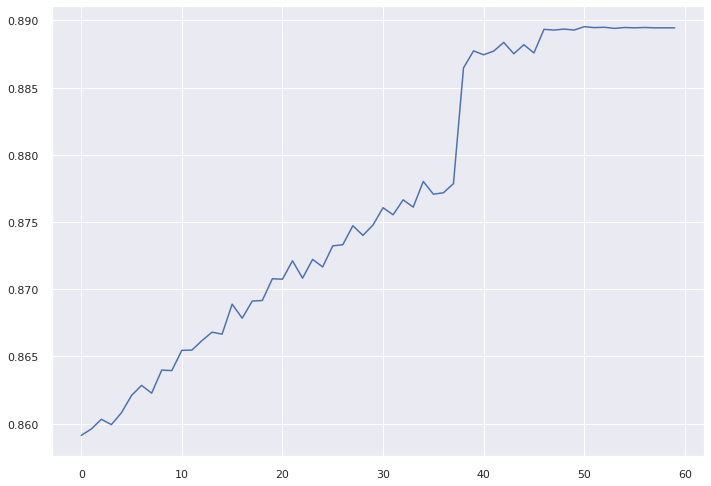

In [66]:
plt.plot(history.history['accuracy'])

We can see that the model accuracy incrases over the number of epochs.

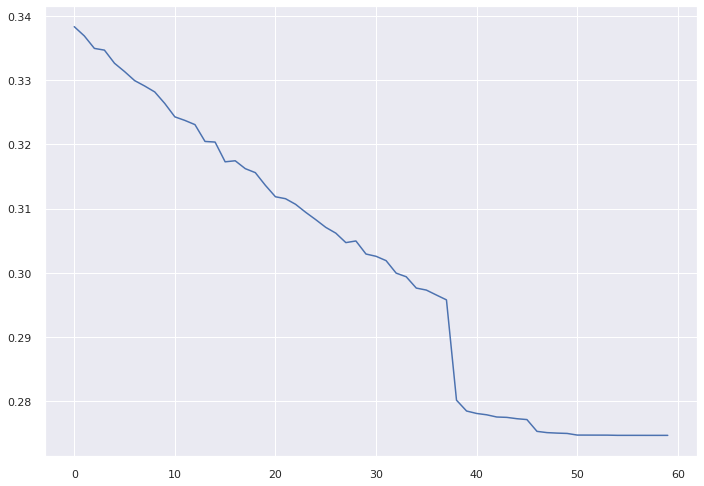

In [67]:
plt.plot(history.history['loss'])

Similarly when the accuracy increases it is natural that the model loss would go down over the number of epochs.

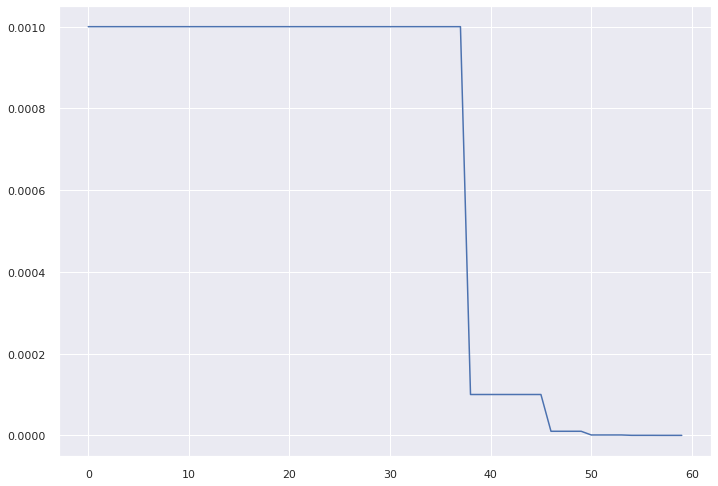

In [68]:
plt.plot(history.history['lr'])

The learning rate of the model decreases as we have used ReduceLROnPlateu that would decrease the learning rate to converge more accurately to the goal.

In [69]:
pred=loaded_model.predict(X_test)
pred_val=np.argmax(pred,axis=1) #getting the one with highest value

In [70]:
nn_acc=accuracy_score(y_test,pred_val)
print(nn_acc)



0.8754695466964997


In [71]:
print(classification_report(y_test,pred_val))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87    169543
           1       0.88      0.91      0.89    226499
           2       0.86      0.89      0.87     28486
           3       0.84      0.73      0.78      2192
           4       0.79      0.56      0.65      7633
           5       0.78      0.73      0.75     13947
           6       0.92      0.86      0.89     16510

    accuracy                           0.88    464810
   macro avg       0.85      0.79      0.82    464810
weighted avg       0.87      0.88      0.87    464810



At the last we compare the accuracy of hyper parameter tuned Random Forest and NN by a barplot

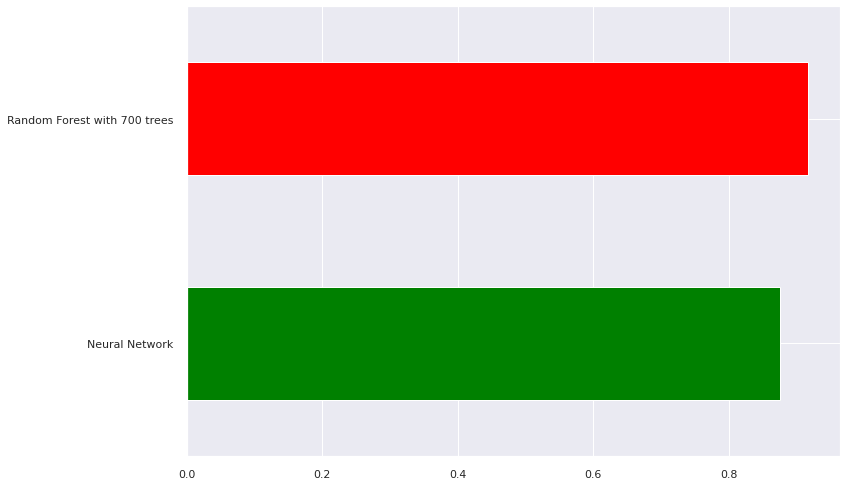

In [72]:
pd.Series([nn_acc,0.9176910995890795],index=['Neural Network','Random Forest with 700 trees']).plot(kind='barh',color=['green','red'])

# Conclusion

In this approach three types of classifcation algorithms are used, first was to pick the best classification model out of the three Machine Learning algorithms and the RandomForsest turned out to be the best algorithm with the default parameters, we evaluted every model using accuracy score and classification report , the accuracy turned out to be 91.61 % .Next in the seek to improve the accuracy of the RandomForsest that was fitted on Cross Validated data we used GridSearchCV to tune the hyperparameters and by trying to increase the number of trees from the default value we found out by fitting 700 tress the accuracy of Random Forest increses.In the last the KERAS which us the most easy to use and understand Deep Learning library is used to create the classfication model and found out that the accuracy is 88 % which is less than the random forest with tuned parameters, it is also an possibility that if we train the deep learning model on better hardware or GPU we may get a better accuracy.